# Introduction to the Basics of NLP

## Get the venv ready

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-11-16 17:47:27--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Auflösen des Hostnamens storage.googleapis.com (storage.googleapis.com)… 142.250.74.208, 142.250.181.240, 216.58.212.176, ...
Verbindungsaufbau zu storage.googleapis.com (storage.googleapis.com)|142.250.74.208|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 607343 (593K) [application/zip]
Wird in »nlp_getting_started.zip.1« gespeichert.

nlp_getting_started 100%[===================>] 593,11K  2,40MB/s    in 0,2s    

2021-11-16 17:47:28 (2,40 MB/s) - »nlp_getting_started.zip.1« gespeichert [607343/607343]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-11-16 17:48:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Auflösen des Hostnamens raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Verbindungsaufbau zu raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 10246 (10K) [text/plain]
Wird in »helper_functions.py« gespeichert.

helper_functions.py 100%[===================>]  10,01K  --.-KB/s    in 0,001s  

2021-11-16 17:48:31 (14,7 MB/s) - »helper_functions.py« gespeichert [10246/10246]



In [ ]:
unzip_data("nlp_getting_started.zip")

## As of here - Run the code

In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Become one with the data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('train.csv',sep=',')

In [ ]:
df_test = pd.read_csv('test.csv',sep=',')

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_train.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## shuffle the training data

In [ ]:
df_train_suffled = df_train.sample(frac=1,random_state=711)

### check the balance of the dataset labels

In [ ]:
np.round(df_train_suffled.target.value_counts()/len(df_train_suffled) * 100,2)

0    57.03
1    42.97
Name: target, dtype: float64

## display random samples and labels

In [ ]:
import random
from sklearn.model_selection import train_test_split

In [ ]:
def show_random_data_and_label(df, sample_size = 10):
    """
    Function that takes in a df with the data and labels and displays #sample_size random data plus labels
    """
    # get random numbers from 0 to len(df)-1
    indexes = random.sample(sorted(df.index.values),sample_size)
    for row in df.iloc[indexes].itertuples():
        print(f"The tweet with text \n{row.text} \nhas label {'catastrophic' if row.target == 1 else 'normal'} \n{'#'*20}")

In [ ]:
show_random_data_and_label(df_train,30)

The tweet with text 
Thu Aug 06 2015 01:20:32 GMT+0000 (UTC)
#millcityio #20150613
theramin sirens 
has label catastrophic 
####################
The tweet with text 
@AuntieDote @RioSlade @Locke_Wiggins @akarb74 Not if one side is set on obliteration of govt and the other on fixing it. That's too far 
has label normal 
####################
The tweet with text 
MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3 
has label catastrophic 
####################
The tweet with text 
@CIA hey you guy's i stopped a massacre so you   send the cops to my house to make this town permanently hate me wtf? 
has label normal 
####################
The tweet with text 
fatal attraction 
has label normal 
####################
The tweet with text 
Hey the #Royals love doing damage with 2 outs. 
has label catastrophic 
####################
The tweet with text 
I think bombing Iran would be kinder... https://t.co/GVm70U2bPm 
has label normal 
####################
The tweet with text 
We are t

### Split the data into train and validation set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_train_suffled.text, df_train_suffled.target, random_state=711)

In [ ]:
len(X_train), len(X_val)

(5709, 1904)

In [ ]:
X_train, y_train

(2980              I'm drowning in spirits to wash you out
 1355    Ah yes the gays are totally destroying America...
 4150    I don't pray harm on members of ISIS.I pray th...
 482              My dog attacked me for my food #pugprobs
 2146    Had lunch with Stewart &amp; Julian only a cou...
                               ...                        
 2452    Madhya Pradesh Train Derailment: Village Youth...
 860     Omron HEM-712C Automatic Blood Pressure Monito...
 1653    Great British Bake Off's back and Dorret's cho...
 4966    def louis is tired plus the meltdown of fans w...
 4077    Strong Thunderstorm 4 Miles North of Japton Mo...
 Name: text, Length: 5709, dtype: object,
 2980    0
 1355    0
 4150    0
 482     0
 2146    0
        ..
 2452    1
 860     0
 1653    1
 4966    0
 4077    1
 Name: target, Length: 5709, dtype: int64)

In [ ]:
X_val, y_val

(4449    Nearly 35 years after their release from capti...
 1114    .@RaniaKhalek true. I faced everything from 'I...
 5914    Update: The police seemed like nice enough peo...
 5590    The Latest: More homes razed by Northern Calif...
 119     320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...
                               ...                        
 1443    @AvBronstein @Popehat @instapundit @KurtSchlic...
 1667    Somehow find you and I collide http://t.co/Ee8...
 7382    If you find your patio table umbrella and chai...
 5395    @QuotesTTG Save the panicking for when you get...
 5832    China's Stock Market Crash: Are There Gems In ...
 Name: text, Length: 1904, dtype: object,
 4449    0
 1114    0
 5914    0
 5590    1
 119     0
        ..
 1443    1
 1667    0
 7382    0
 5395    0
 5832    0
 Name: target, Length: 1904, dtype: int64)

## Converting our text data into numbers

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from tensorflow.keras import layers

In [ ]:
# find the average number of tokens (words) in the training tweets
max_length = round(np.mean(X_train.apply(lambda x: len(x.split(' ')))))

In [ ]:
max_length

15

In [ ]:
# set the max number of different words
max_vocab_length = 10000

In [ ]:
# use the default textvectorization parameters
text_vectorizer = layers.experimental.preprocessing.TextVectorization(
    max_tokens=max_vocab_length, # how many different words
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=max_length, # none means = padding each sequence to the longest sequence
)

In [ ]:
# fit the text vectorizer to the the training data
text_vectorizer.adapt(X_train)

In [ ]:
# create a sample sentance and vectorize it
sample_sentence = "There is a flood in my street and uh this is sooo sooo sooo soooo horrible"
text_vectorizer(sample_sentence)

<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([  74,    9,    3,  222,    4,   13,  710,    7, 6360,   19,    9,
       7300, 7300, 7300, 3950])>

In [ ]:
# convert a random sample to vector
random_sentence = random.choice(X_train.to_numpy())
print(random_sentence)
text_vectorizer(random_sentence)

Sure - take them away from fire fighting for King Stevie &amp; Crusty to have a photo-op ! http://t.co/epeX4axG4b


<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([ 413,  166,   99,  445,   20,   47, 1333,   10, 1046, 7116,   33,
       5113,    5,   21,    3])>

In [ ]:
# get most frequent tokens
text_vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [ ]:
# display least frequent tokens
text_vectorizer.get_vocabulary()[-10:]

['llll',
 'llegaste',
 'lizzie363',
 'lizhphoto',
 'lizards',
 'liye',
 'livingsafely',
 'livin',
 'liveworkshop',
 'livestreaming']

## Create an embedding (layer)

In [ ]:
# import the embedding layer
from tensorflow.keras.layers import Embedding

In [ ]:
max_vocab_length

10000

In [ ]:
max_length

15

In [ ]:
embedding = Embedding(
    input_dim = max_vocab_length,
    output_dim = 128,
    input_length = max_length
)

In [ ]:
# convert a random sample to an embedding
random_sentence = random.choice(X_train.to_numpy())
print(random_sentence)
random_embedding = embedding(text_vectorizer([random_sentence]))
random_embedding

Major Hamayun Shaheed pilot of MI-7 heli that crashed in Mansehra http://t.co/2z8UbsY5M8


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02313563,  0.02182424,  0.02505607, ..., -0.02562441,
          0.01138376, -0.00744376],
        [ 0.04146779,  0.022436  , -0.01522707, ...,  0.0089849 ,
          0.00355768,  0.04911241],
        [ 0.03839778,  0.03957102, -0.01678701, ..., -0.04556904,
         -0.02656103,  0.03557526],
        ...,
        [ 0.02738244,  0.04746691, -0.03518092, ...,  0.04600853,
         -0.03629923,  0.01127555],
        [ 0.02738244,  0.04746691, -0.03518092, ...,  0.04600853,
         -0.03629923,  0.01127555],
        [ 0.02738244,  0.04746691, -0.03518092, ...,  0.04600853,
         -0.03629923,  0.01127555]]], dtype=float32)>

In [ ]:
# what length has embedding
len(random_embedding)

1

In [ ]:
len(random_embedding[0])

15

# Creating a baseline model: Naive Bayes

In [ ]:
# recall what do we have so far?

# we have a shuffled training and a validation set
# X_train, y_train
# X_val, y_val

# we have a test df (clearly without labels)
# df_test

# we have created a text_vectorizer layer that is adapted to our training data
# text_vectorizer
# we have used max_vocab_length of different words (most frequent words in the training data)
# and we use a maximal input length of the training samples (sentences) of max_length, i.e. the first max_length words in the sentence
# we calculated that being the average sentence length

# we have created a keras embedding layer
# embedding

### course experiments

In [ ]:
# Imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create the pipeline
model_0 = Pipeline(
[
    ('tfidf', TfidfVectorizer()), # convert words to numbers
    ('clf', MultinomialNB()) # model to text
])

# fit the model
model_0.fit(X_train,y_train)

NameError: ignored

In [ ]:
# predict on validation set and evaluate
baseline_score = model_0.score(X_val,y_val)
print("Our baseline model achieves an accuracy of %d Percent" %np.round(baseline_score*100,2))

In [ ]:
baseline_preds = model_0.predict(X_val)

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt
# create a function for different evaluation scores for our models
def get_evaluation_scores(y_true, y_pred, model_name=''):
    '''
    Function to evaluate accuracy, precision, recall and f1 score for our ground_truth y_true and the models predictions y_pred.
    The positive class is the class of interest, which we assume is encoded by 1 in the data.
    We also create a nice confusion matrix.
    '''
    conf_mat = confusion_matrix(y_true,y_pred)
    heatmap(conf_mat,annot=True,fmt='',cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predictions')
    plt.xticks(np.arange(2)+0.5,['no disaster - 0','disaster - 1'])    
    plt.yticks(np.arange(2)+0.5,['no disaster - 0','disaster - 1'])
    plt.ylabel('Ground truth')
    plt.show()
    # compute the accuracy and print it out
    acc = (conf_mat[0][0] + conf_mat[1][1]) / np.sum(conf_mat)
    print(f"The accuracy of the {model_name} model is {np.round(acc*100,2)}%")
    
    # compute the precision and print it out
    precision = conf_mat[1][1] / (conf_mat[1][1]+conf_mat[0][1])
    print(f"The precision of the {model_name} model is {np.round(precision*100,2)}%")

    # compute the recall and print it out
    recall = conf_mat[1][1] / (conf_mat[1][1]+conf_mat[1][0])
    print(f"The recall of the {model_name} model is {np.round(recall*100,2)}%")
    
    # compute the recall and print it out
    f1 = (2 * precision * recall) / (precision + recall)
    print(f"The F1 score of the {model_name} model is {np.round(f1*100,2)}%")
    return f1

In [ ]:
f1 = get_evaluation_scores(y_val,baseline_preds,'baseline')

# Model 1: A simple dense model

In [ ]:
# create a tensorboard callback
from helper_functions import create_tensorboard_callback
from tensorflow.keras import layers
save_dir = 'model_logs'

In [ ]:
# build the model with the functional API

# define inputs
inputs = layers.Input(shape=(1,),dtype=tf.string,name='input_layer')

# convert our string inputs to integers
x = text_vectorizer(inputs)

# create the embedding of our encoded input strings
x = embedding(x)

x = layers.GlobalAveragePooling1D()(x)

outputs = layers.Dense(1, activation='sigmoid',name='output_layer')(x)

In [ ]:
# construct the model
model_1 = tf.keras.Model(inputs,outputs,name='model_1_simple_dense')

In [ ]:
# print the summary
model_1.summary()

Model: "model_1_simple_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow

In [ ]:
# compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tensorflow.keras.optimizers.Adam(),
    metrics='accuracy'
)

In [ ]:
#config = tf.compat.v1.ConfigProto(allow_soft_placement=True)

In [ ]:
# fit the model
model_1_history = model_1.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    epochs=5,
    callbacks = [
        create_tensorboard_callback(save_dir,experiment_name='model_1_dense')
    ]
)

Saving TensorBoard log files to: model_logs/model_1_dense/20211122-083114
Epoch 1/5
179/179 [==============================] - 6s 32ms/step - loss: 0.6281 - accuracy: 0.6761 - val_loss: 0.5539 - val_accuracy: 0.7584
Epoch 2/5
179/179 [==============================] - 5s 25ms/step - loss: 0.4652 - accuracy: 0.8131 - val_loss: 0.4700 - val_accuracy: 0.7841
Epoch 3/5
179/179 [==============================] - 5s 27ms/step - loss: 0.3630 - accuracy: 0.8541 - val_loss: 0.4461 - val_accuracy: 0.8030
Epoch 4/5
179/179 [==============================] - 4s 25ms/step - loss: 0.2927 - accuracy: 0.8874 - val_loss: 0.4453 - val_accuracy: 0.8025
Epoch 5/5
179/179 [==============================] - 4s 25ms/step - loss: 0.2406 - accuracy: 0.9131 - val_loss: 0.4589 - val_accuracy: 0.7973


In [ ]:
# evaluate the model
model_1.evaluate(X_val,y_val)

60/60 [==============================] - 0s 7ms/step - loss: 0.4589 - accuracy: 0.7973


[0.4588753879070282, 0.7972689270973206]

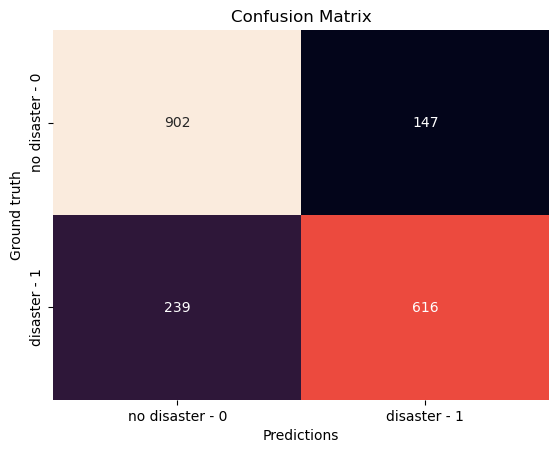

The accuracy of the Model 1 model is 79.73%
The precision of the Model 1 model is 80.73%
The recall of the Model 1 model is 72.05%
The F1 score of the Model 1 model is 76.14%


In [ ]:
model_1_preds = model_1.predict(X_val)
get_evaluation_scores(y_val,np.round(model_1_preds.reshape(-1)),'Model 1')

### visualizing our learned embedding

In [ ]:
# get the vocabulary from the text vectorizer layer
words_in_vocab = text_vectorizer.get_vocabulary()

In [ ]:
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# get the weight matrix of embedding layer
emb_weigths = model_1.layers[2].get_weights()[0]
# for each token in the vocab we have now a vector with 128 dims
emb_weigths.shape

(10000, 128)

## Using the Tensorflow Projector tool to visualize our embeddings

In [ ]:
import io

In [ ]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
    if index == 0:
        continue  # skip 0, it's padding.
    vec = emb_weigths[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()

# Model 2 - our first RNN Model

In [ ]:
# create lstm model

# create the input layer
inputs = layers.Input(shape=(1,),dtype=tf.string,name='inputs')

# pass the inputs to the text_vectorizer
x = text_vectorizer(inputs)

# create the embedding
x = embedding(x)
#print(x.shape)
# pass the embedding of our embeddings to the LSTM
# when stacking rnn cells you need to return sequences
# x = layers.LSTM(units=64, return_sequences=True,name='LSTM1')(x)
#print(x.shape)
x = layers.LSTM(units=64,name='LSTM2')(x)
#print(x.shape)
# first dense layer
x = layers.Dense(64, activation='relu',name='dense1')(x)

# create the output layer
outputs = layers.Dense(1, activation='sigmoid',name='output_layer')(x)

# create the model
model_2 = tf.keras.Model(inputs,outputs,name='model_2_LSTM')


In [ ]:
# summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
LSTM2 (LSTM)                 (None, 64)                49408     
_________________________________________________________________
dense1 (Dense)               (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,333,633
Trainable params: 1,333,633
Non-trainable params: 0
____________________________________________

In [ ]:
# compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics='accuracy'
)

In [ ]:
# fit the model
model_2_history = model_2.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_val,y_val),
    callbacks=[create_tensorboard_callback(save_dir, "model_2_LSTM")]
)

Saving TensorBoard log files to: model_logs/model_2_LSTM/20211122-083140
Epoch 1/5
179/179 [==============================] - 8s 40ms/step - loss: 0.2135 - accuracy: 0.9180 - val_loss: 0.6441 - val_accuracy: 0.7826
Epoch 2/5
179/179 [==============================] - 6s 33ms/step - loss: 0.1593 - accuracy: 0.9383 - val_loss: 0.5251 - val_accuracy: 0.7542
Epoch 3/5
179/179 [==============================] - 6s 33ms/step - loss: 0.1554 - accuracy: 0.9417 - val_loss: 0.6512 - val_accuracy: 0.7899
Epoch 4/5
179/179 [==============================] - 6s 34ms/step - loss: 0.1482 - accuracy: 0.9432 - val_loss: 0.5886 - val_accuracy: 0.7868
Epoch 5/5
179/179 [==============================] - 6s 34ms/step - loss: 0.1428 - accuracy: 0.9453 - val_loss: 0.7660 - val_accuracy: 0.7715


In [ ]:
model_2_preds = model_2.predict(X_val)
model_2_preds[:10]

array([[9.9991083e-01],
       [9.9470937e-01],
       [8.6967200e-02],
       [9.9990785e-01],
       [3.0849368e-04],
       [9.9774659e-01],
       [7.9730159e-04],
       [2.4134446e-02],
       [1.0911843e-01],
       [2.1237873e-01]], dtype=float32)

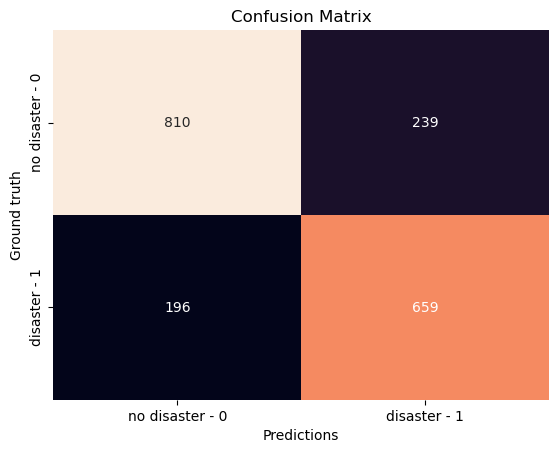

The accuracy of the Model 2 model is 77.15%
The precision of the Model 2 model is 73.39%
The recall of the Model 2 model is 77.08%
The F1 score of the Model 2 model is 75.19%


In [ ]:
get_evaluation_scores(y_val,np.round(model_2_preds.reshape(-1)),'Model 2')

# Model 3 - RNN with GRU cell

In [ ]:
# build the model
inputs = layers.Input(shape=(1,),dtype=tf.string,name='inputs')

# pass the inputs to the vectorizer layer
x = text_vectorizer(inputs)

# pass the numericals to the embedding layer
x = embedding(x)

# pass it to the gru cell
x = layers.GRU(64)(x)
#x = layers.LSTM(64,return_sequence=True)(x)
#x = layers.GRU(64)(x)
# pass it to the first dense layer
# if we use one gru layer and return sequence = True then we would need a global average pooling layer 
# to reduce our dimension to get one prediction per sequence and not per token
# x = layers.GlobalAveragePooling1D()(x)

#x = layers.Dense(64,activation='relu',name='dense1')(x)

# get the outputs
outputs = layers.Dense(1,activation='sigmoid')(x)

# construct the model
model_3 = tf.keras.Model(inputs,outputs,name='model_3')

In [ ]:
# compile model 3
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics='accuracy'
)

In [ ]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 128)           1280000   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model
model_3_histroy = model_3.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_val,y_val),
    callbacks=[create_tensorboard_callback(save_dir,'model_3_GRU')]
)

Saving TensorBoard log files to: model_logs/model_3_GRU/20211122-083213
Epoch 1/5
179/179 [==============================] - 8s 39ms/step - loss: 0.2400 - accuracy: 0.9007 - val_loss: 0.5906 - val_accuracy: 0.7841
Epoch 2/5
179/179 [==============================] - 6s 33ms/step - loss: 0.1429 - accuracy: 0.9471 - val_loss: 0.6143 - val_accuracy: 0.7689
Epoch 3/5
179/179 [==============================] - 6s 33ms/step - loss: 0.1142 - accuracy: 0.9594 - val_loss: 0.6730 - val_accuracy: 0.7616
Epoch 4/5
179/179 [==============================] - 6s 34ms/step - loss: 0.0973 - accuracy: 0.9632 - val_loss: 0.8737 - val_accuracy: 0.7458
Epoch 5/5
179/179 [==============================] - 6s 33ms/step - loss: 0.0870 - accuracy: 0.9664 - val_loss: 0.9156 - val_accuracy: 0.7642


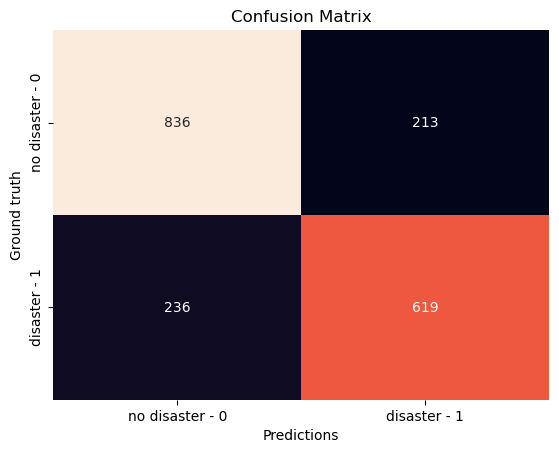

The accuracy of the Model 3 model is 76.42%
The precision of the Model 3 model is 74.4%
The recall of the Model 3 model is 72.4%
The F1 score of the Model 3 model is 73.38%


In [ ]:
model_3_preds = model_3.predict(X_val)
get_evaluation_scores(y_val,np.round(model_3_preds.reshape(-1)),'Model 3')

# Model 4 - Bidirection LSTM

In [ ]:
# create the inputs 
inputs = layers.Input(shape=(1,),dtype=tf.string,name='input_layer')

# pass the inputs to the vectorized
x = text_vectorizer(inputs)

# pass the numerical encoding to the embedding layer
x = embedding(x)

# pass the embedding to the bidirectional lstm
x = layers.Bidirectional(layers.LSTM(64))(x)

# pass it to dense layer
x = layers.Dense(64,activation='relu',name='dense1')(x)

outputs = layers.Dense(1,activation='sigmoid',name='outputs')(x)

# create the model
model_4 = tf.keras.Model(inputs,outputs,name='model_4_bidirectional')

In [ ]:
# compile the model
model_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics='accuracy'
)

In [ ]:
# fit the model
history_model_4 = model_4.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_val,y_val),
    callbacks=[create_tensorboard_callback(save_dir,'model_4_BidirectionalLSTM')]
)

Saving TensorBoard log files to: model_logs/model_4_BidirectionalLSTM/20211122-083246
Epoch 1/5
179/179 [==============================] - 11s 54ms/step - loss: 0.1200 - accuracy: 0.9651 - val_loss: 1.0007 - val_accuracy: 0.7584
Epoch 2/5
179/179 [==============================] - 8s 45ms/step - loss: 0.0630 - accuracy: 0.9746 - val_loss: 0.9446 - val_accuracy: 0.7663
Epoch 3/5
179/179 [==============================] - 8s 45ms/step - loss: 0.0611 - accuracy: 0.9760 - val_loss: 1.2365 - val_accuracy: 0.7584
Epoch 4/5
179/179 [==============================] - 8s 45ms/step - loss: 0.0591 - accuracy: 0.9774 - val_loss: 1.2770 - val_accuracy: 0.7626
Epoch 5/5
179/179 [==============================] - 8s 45ms/step - loss: 0.0564 - accuracy: 0.9786 - val_loss: 0.9914 - val_accuracy: 0.7631


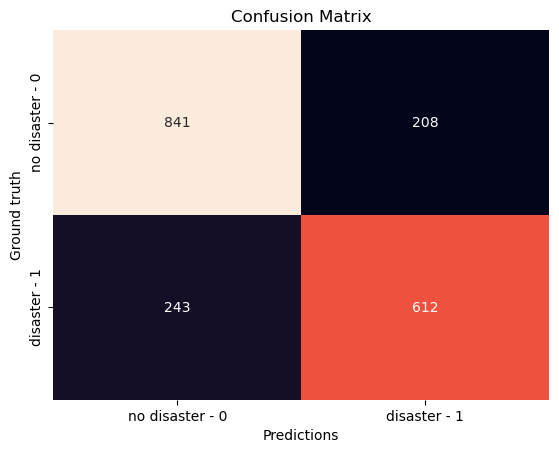

The accuracy of the Model 4 model is 76.31%
The precision of the Model 4 model is 74.63%
The recall of the Model 4 model is 71.58%
The F1 score of the Model 4 model is 73.07%


In [ ]:
model_4_preds = model_4.predict(X_val)
get_evaluation_scores(y_val,np.round(model_4_preds.reshape(-1)),'Model 4')

# Model 5 - Conv1D NN

## Understanding what we are doing with an example

In [ ]:
# creating the embedding
embedded = embedding(text_vectorizer(['This is a test sentence']))
print('after embedding shape', embedded.shape)

# pass the embedding through our 1dconv layer
conv = layers.Conv1D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='valid',
    activation='relu'
)(embedded)
print('after conv1d shape', conv.shape)

# after average pooling
pooled = layers.GlobalMaxPooling1D()(conv)
print('after pooling', pooled.shape)

after embedding shape (1, 15, 128)
after conv1d shape (1, 13, 32)
after pooling (1, 32)


In [ ]:
print(np.max([conv[0][i][1] for i in range(13)]))
print(pooled[0][1])

0.08829118
tf.Tensor(0.08829118, shape=(), dtype=float32)


In [ ]:
!pip install tensorflow_hub

In [ ]:
# understand how maxpooling1d works
for j in range(32):
    print(np.max([conv[0][i][j] for i in range(13)]) == pooled[0][j])

tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(True, shape=(), dtype=bool)
tf.Tensor(Tr

## The model

In [ ]:
# create the input layer
inputs = layers.Input(shape=(1,),dtype=tf.string,name='input_layer')
print(x.shape)
# pass the inputs to the text vectorizer
x = text_vectorizer(inputs)
print(x.shape)
# pass the encoded inputs to the embedding layer
x = embedding(x)
print(x.shape)
# hand the embeddings over to a 1D ConvLayer
x = layers.Conv1D(32,3,name='conv1d_layer', activation='relu')(x)
print(x.shape)

# globalavg pool layer to reduce the dims
x = layers.GlobalAveragePooling1D()(x)
print(x.shape)
# create the output layer
outputs = layers.Dense(1,activation='sigmoid')(x)

# create the model
model_5 = tf.keras.Model(inputs,outputs,name='model_5_conv1d')

(None, 64)
(None, 15)
(None, 15, 128)
(None, 13, 32)
(None, 32)


In [ ]:
# compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics='accuracy'
)

In [ ]:
# fit the model
history_model_5 = model_5.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_val,y_val),
    callbacks=[create_tensorboard_callback(save_dir,'model_5_conv1d')]
)

Saving TensorBoard log files to: model_logs/model_5_conv1d/20211122-083331
Epoch 1/5
179/179 [==============================] - 6s 31ms/step - loss: 0.2482 - accuracy: 0.9327 - val_loss: 0.5779 - val_accuracy: 0.7694
Epoch 2/5
179/179 [==============================] - 5s 26ms/step - loss: 0.1179 - accuracy: 0.9571 - val_loss: 0.7097 - val_accuracy: 0.7752
Epoch 3/5
179/179 [==============================] - 5s 26ms/step - loss: 0.0899 - accuracy: 0.9660 - val_loss: 0.8411 - val_accuracy: 0.7668
Epoch 4/5
179/179 [==============================] - 5s 26ms/step - loss: 0.0772 - accuracy: 0.9706 - val_loss: 0.9131 - val_accuracy: 0.7642
Epoch 5/5
179/179 [==============================] - 5s 26ms/step - loss: 0.0686 - accuracy: 0.9732 - val_loss: 0.9809 - val_accuracy: 0.7600


# Model 6 - Tensorflow Hub Universal Sentence Encoder

In [ ]:
import tensorflow_hub as hub

In [ ]:
# setup the model path
model_path = '/Users/johanneseder/Documents/Python/08_Introduction_to_NLP/tensorflow_hub/universal-sentence-encoder_4/'

In [ ]:
# load the model from local file
tf_use = tf.saved_model.load(model_path)

In [ ]:
# check if the loading of the model was successfull
tf_use_embedding_example = tf_use([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(tf_use_embedding_example)

tf.Tensor(
[[-0.03133018 -0.06338633 -0.01607501 ... -0.0324278  -0.0457574
   0.05370455]
 [ 0.05080862 -0.0165243   0.01573778 ...  0.00976658  0.03170123
   0.01788118]], shape=(2, 512), dtype=float32)


In [ ]:
use_encoder_layer = hub.KerasLayer(
    tf_use,
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name='USE'
)

In [ ]:
# build a model using the USE
model_6 = tf.keras.Sequential([
    use_encoder_layer,
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
],name='model_6_USE')

In [ ]:
# compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics='accuracy'
)

In [ ]:
# fit the model
history_model_6 = model_6.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_val,y_val),
    callbacks=[create_tensorboard_callback(save_dir,'model_6_USE')]
)

Saving TensorBoard log files to: model_logs/model_6_conv1d/20211122-083359

Got `type(handle)`: <class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>
Epoch 1/5
179/179 [==============================] - 18s 95ms/step - loss: 0.4778 - accuracy: 0.7884 - val_loss: 0.4294 - val_accuracy: 0.8146
Epoch 2/5
179/179 [==============================] - 9s 48ms/step - loss: 0.3956 - accuracy: 0.8278 - val_loss: 0.4100 - val_accuracy: 0.8199
Epoch 3/5
179/179 [==============================] - 8s 46ms/step - loss: 0.3649 - accuracy: 0.8415 - val_loss: 0.4147 - val_accuracy: 0.8178
Epoch 4/5
179/179 [==============================] - 8s 44ms/step - loss: 0.3319 - accuracy: 0.8635 - val_loss: 0.4297 - val_accuracy: 0.8172
Epoch 5/5
179/179 [==============================] - 7s 40ms/step - loss: 0.2915 - accuracy: 0.8821 - val_loss: 0.4524 - val_accuracy: 0.8146


In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_10 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 256,871,809
Trainable params: 73,985
Non-trainable params: 256,797,824
_________________________________________________________________


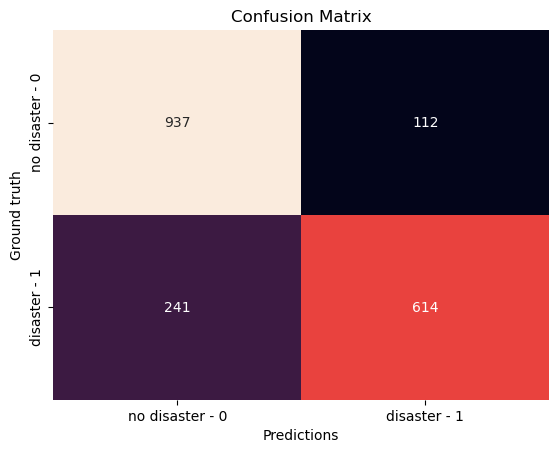

The accuracy of the Model 6 model is 81.46%
The precision of the Model 6 model is 84.57%
The recall of the Model 6 model is 71.81%
The F1 score of the Model 6 model is 77.67%


In [ ]:
model_6_preds = model_6.predict(X_val)
get_evaluation_scores(y_val,np.round(model_6_preds.reshape(-1)),'Model 6')

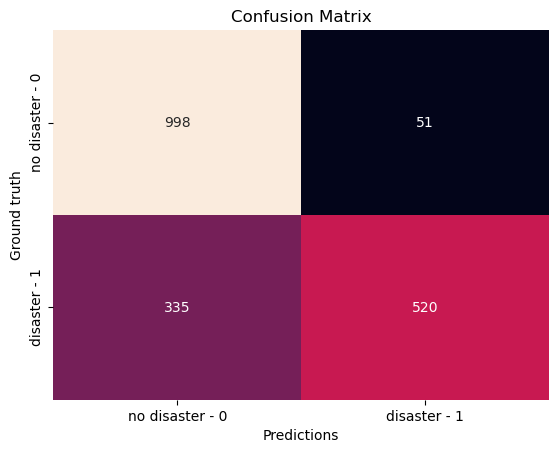

The accuracy of the baseline model is 79.73%
The precision of the baseline model is 91.07%
The recall of the baseline model is 60.82%
The F1 score of the baseline model is 72.93%


In [ ]:
get_evaluation_scores(y_val,baseline_preds,'baseline')

### finally managed to beat our baseline :D 

# Model 7 = 10 % of the data

In [ ]:
y_train.sum()/len(y_train) * 100

42.31914520931862

In [ ]:
(len(y_train)-y_train.sum())/len(y_train) * 100

57.68085479068138

In [ ]:
X_train_10_percent = X_train.sample(frac=0.1,random_state=711)
y_train_10_percent = y_train.loc[X_train_10_percent.index.values]

In [ ]:
# build a model using the USE
model_7 = tf.keras.Sequential([
    use_encoder_layer,
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
],name='model_7_USE_10percent')

In [ ]:
# compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics='accuracy'
)

In [ ]:
# fit the model
history_model_7 = model_7.fit(
    X_train_10_percent,
    y_train_10_percent,
    epochs=5,
    validation_data=(X_val,y_val),
    callbacks=[create_tensorboard_callback(save_dir,'model_7_use_10percent')]
)

Saving TensorBoard log files to: model_logs/model_7_use_10percent/20211122-083455

Got `type(handle)`: <class 'tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject'>
Epoch 1/5
18/18 [==============================] - 11s 568ms/step - loss: 0.6663 - accuracy: 0.6410 - val_loss: 0.6359 - val_accuracy: 0.7269
Epoch 2/5
18/18 [==============================] - 5s 288ms/step - loss: 0.5528 - accuracy: 0.8144 - val_loss: 0.5221 - val_accuracy: 0.7847
Epoch 3/5
18/18 [==============================] - 4s 247ms/step - loss: 0.4179 - accuracy: 0.8354 - val_loss: 0.4614 - val_accuracy: 0.7852
Epoch 4/5
18/18 [==============================] - 4s 217ms/step - loss: 0.3412 - accuracy: 0.8564 - val_loss: 0.4647 - val_accuracy: 0.7894
Epoch 5/5
18/18 [==============================] - 3s 198ms/step - loss: 0.2851 - accuracy: 0.8914 - val_loss: 0.4852 - val_accuracy: 0.7841


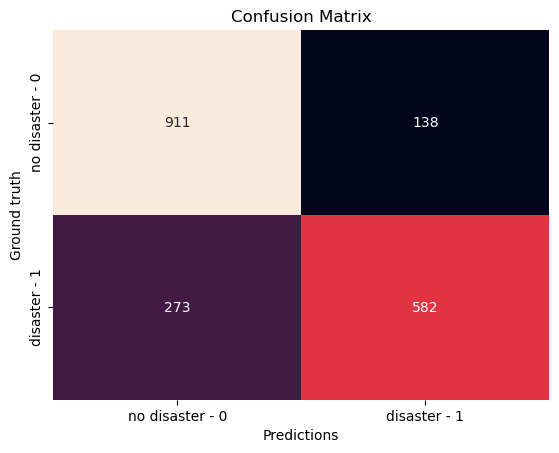

The accuracy of the Model 7 model is 78.41%
The precision of the Model 7 model is 80.83%
The recall of the Model 7 model is 68.07%
The F1 score of the Model 7 model is 73.9%


In [ ]:
model_7_preds = model_7.predict(X_val)
get_evaluation_scores(y_val,np.round(model_7_preds.reshape(-1)),'Model 7')

# Uploading everything to Tensorboard

In [ ]:
'''!tensorboard dev upload --logdir model_logs/ \
    --name "My first NLP Models" \
    --description "Simple comparison between different nlp models using different nlp architectures"  \
    --one_shot'''

'!tensorboard dev upload --logdir model_logs/     --name "My first NLP Models"     --description "Simple comparison between different nlp models using different nlp architectures"      --one_shot'

**Tensorboard Dashboard available at:** https://tensorboard.dev/experiment/Av04a3uzRN68Yg9a3SQDUg/

In [ ]:
# list all available experiments and get experiment id to delete
'''!tensorboard dev list'''

'!tensorboard dev list'

In [ ]:
# delete available dashboard from experiment id
'''!tensorboard dev delete --experiment_id 82838383'''

'!tensorboard dev delete --experiment_id 82838383'

# Visualizing our most wrong predictions

In [ ]:
df_preds = pd.DataFrame({
    'text': X_val.values,
    'label': y_val.values,
    'prediction': np.round(model_7_preds.reshape(-1)),
    'prediction_probs': model_7_preds.reshape(-1)
})

In [ ]:
# print the most wrong false positives
for row in df_preds.loc[df_preds.label==0].sort_values(by=['prediction_probs'],axis=0,ascending=False).iloc[:10].itertuples():
    _, text, label, prediction, prediction_proba = row
    print(f'Expected label not disaster (0) for the text but got label %d with probability {round(prediction_proba*100)} Percent \n \"%s\" ' %(prediction,text))
    print('\n')

Expected label not disaster (0) for the text but got label 1 with probability 96 Percent 
 "@adorableappple No reported flooding po in the area. Ten-4. #mmda" 


Expected label not disaster (0) for the text but got label 1 with probability 96 Percent 
 "RT '@NASASolarSystem: Jupiter's Red Spot is a violent storm larger than the entire Earth: http://t.co/i0Tvl15CoZ http://t.co/IgtXhapO0K" 


Expected label not disaster (0) for the text but got label 1 with probability 96 Percent 
 "@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods" 


Expected label not disaster (0) for the text but got label 1 with probability 94 Percent 
 "@TwopTwips make natural disaster reporting more interesting by adding 'The' to headlines such as 'Rescuers are sifting through the wreckage'" 


Expected label not disaster (0) for the text but got label 1 with probability 94 Percent 
 "General News Û¢åÊ'Demolition of houses on waterways b

In [ ]:
# print the most wrong false negatives
for row in df_preds.loc[df_preds.label==1].sort_values(by=['prediction_probs'],axis=0,ascending=True).iloc[:10].itertuples():
    _, text, label, prediction, prediction_proba = row
    print(f'Expected label disaster (1) for the text but got label %d with prediciton probability {round(prediction_proba*100)} Percent \n \"%s\" ' %(prediction,text))
    print('\n')

Expected label disaster (1) for the text but got label 0 with prediciton probability 1 Percent 
 "@Stretcher @witter @Rexyy @Towel show me a picture of it" 


Expected label disaster (1) for the text but got label 0 with prediciton probability 1 Percent 
 "tomorrow's going to be a year since I went to the Panic! concert dressed as afycso ryan do u guys remember that" 


Expected label disaster (1) for the text but got label 0 with prediciton probability 2 Percent 
 "Omg if Cain dies i will be an emotional wreck #emmerdale" 


Expected label disaster (1) for the text but got label 0 with prediciton probability 2 Percent 
 "The Dress Memes Have Officially Exploded On The Internet http://t.co/3drSmxw3cr" 


Expected label disaster (1) for the text but got label 0 with prediciton probability 2 Percent 
 "@xDescry I was wrong to call it trusty actually.. considering it spontaneously collapsed on me that's not very trusty." 


Expected label disaster (1) for the text but got label 0 with pre

# Making prediction on our test data

In [ ]:
model_7_preds = model_7.predict(df_test.text)

array([[0.6454274 ],
       [0.9260822 ],
       [0.87758064],
       ...,
       [0.92015433],
       [0.77166647],
       [0.88467324]], dtype=float32)

In [ ]:
np.round(model_7_preds.reshape(-1))

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [ ]:
df_test['target'] = np.round(model_7_preds.reshape(-1))

In [ ]:
df_test[['target']].value_counts()

target
0.0       2037
1.0       1226
dtype: int64

In [ ]:
show_random_data_and_label(df_test)

The tweet with text 
smoke me out 
has label normal 
####################
The tweet with text 
When the game tells you to stop going to the Nether by spawning you right over lava. GG @AlienatePlays http://t.co/rGc1afqLmN 
has label normal 
####################
The tweet with text 
A reminder: White Americans are the biggest terror threat in the United States according to new study. http://t.co/BqzhPjOTF5 
has label catastrophic 
####################
The tweet with text 
Deaths 2 http://t.co/4A1fSwePpg 
has label catastrophic 
####################
The tweet with text 
NEW! Are souls punished with annihilation? http://t.co/cmNV6VyFCQ 
has label normal 
####################
The tweet with text 
@simplyysacred dude like he screams his soul out 
has label normal 
####################
The tweet with text 
@1outside in the series the deaths seemed one right after another but in the book it seems a month or more will pass after the death of Liz 
has label normal 
####################
The tweet

# The speed/score tradeoff

In [ ]:
# create a function for different evaluation scores for our models
def get_evaluation_scores_mod(y_true, y_pred):
    '''
    Function to evaluate accuracy, precision, recall and f1 score for our ground_truth y_true and the models predictions y_pred.
    The positive class is the class of interest, which we assume is encoded by 1 in the data.
    We also create a nice confusion matrix.
    '''
    conf_mat = confusion_matrix(y_true,y_pred)

    # compute the precision and print it out
    precision = conf_mat[1][1] / (conf_mat[1][1]+conf_mat[0][1])
    # compute the recall and print it out
    recall = conf_mat[1][1] / (conf_mat[1][1]+conf_mat[1][0])
    
    # compute the recall and print it out
    f1 = (2 * precision * recall) / (precision + recall)
    return f1

In [ ]:
import time
def measure_time(model,data,loops=10):
    '''Measures the time the model needs to predict on data.'''
    start_time = time.perf_counter()
    for _ in range(10):
        y_pred = model.predict(data)
    end_time = time.perf_counter()
    elapsed_time_avg = (end_time - start_time) / 10
    time_per_sample = elapsed_time_avg/len(data)
    print('Time average time needed to predict %f seconds, Avgerage time per sample %f seconds'%(elapsed_time_avg,time_per_sample))
    return time_per_sample

In [ ]:
tps_m6 = measure_time(model_6,X_val)

Time average time needed to predict 1.511111 seconds, Avgerage time per sample 0.000794 seconds


In [ ]:
tps_m0 = measure_time(model_0,X_val,y_val)

Time average time needed to predict 0.014284 seconds, Avgerage time per sample 0.000008 seconds


In [ ]:
f1_base = get_evaluation_scores_mod(y_val,np.round(model_0.predict(X_val).reshape(-1)))
f1_model_6 = get_evaluation_scores_mod(y_val,np.round(model_6.predict(X_val).reshape(-1)))

In [ ]:
f1_base

0.729312762973352

In [ ]:
f1_model_6

0.7767235926628717

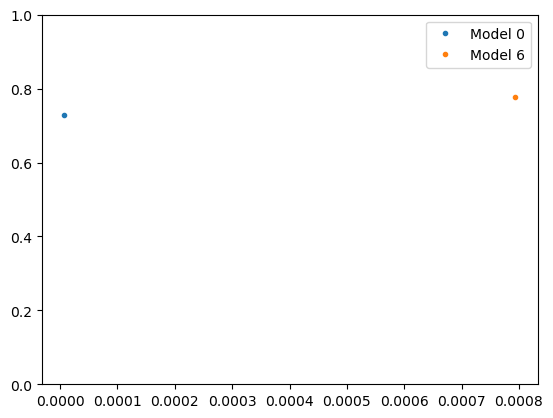

In [ ]:
plt.plot(tps_m0,f1_base,'.')
plt.plot(tps_m6,f1_model_6,'.')
plt.ylim([0,1])
plt.legend(['Model 0', 'Model 6'])
plt.show()

In [2]:
def greet_me(**kwargs):
    print(kwargs['name'])

greet_me(name="yasoob")


yasoob
